In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Case Study

## Data description & Goal

In [2]:
#Descrpition: the dataframe shows the features of the customers of a car insurance company who are claiming the amount of their policy.
#Goal: understand if there is a relation between any of the customer features with the total claim amount of their policies

# Getting the Data

In [3]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df.info()
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Clearing/Wrangling/EDA

## 1. Change headers names and Deal with NaN values

In [5]:
df.select_dtypes(include=np.object).nunique()

Customer             9134
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

In [6]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
def stand(x):
    first_column = x.pop('Effective To Date') #decided to move "Effective to Date" to first to make the data encoding easier later
    x.insert(0,'Effective To Date', first_column)
    last_column = x.pop('Total Claim Amount')
    x.insert(23, 'Total Claim Amount', last_column)
    x.rename(columns = {'Customer Lifetime Value' : 'clv', 'EmploymentStatus' : 'Es', 'Total Claim Amount' : 'tca'}, inplace = True)
    x.columns = x.columns.str.lower()
    return x

stand(df)

,effective to date,customer,state,clv,response,coverage,education,es,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,tca
0,2/24/11,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,1/31/11,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,2/19/11,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,1/20/11,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2/3/11,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2/10/11,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,198.234764
9130,2/12/11,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
9131,2/6/11,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
9132,2/3/11,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,691.200000


## 2. Categorical and Numerical features

In [8]:
df.dtypes

effective to date                 object
customer                          object
state                             object
clv                              float64
response                          object
coverage                          object
education                         object
es                                object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
vehicle class                     object
vehicle size                      object
tca                              float64
dtype: object

In [9]:
dfnumerical = df.select_dtypes(include=np.number)
print(dfnumerical.columns)
dfnumerical.head(10)

Index(['clv', 'income', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'tca'],
      dtype='object')


,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,tca
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000
7,7216.100311,0,101,0,68,0,4,363.029680
8,24127.504020,14072,71,13,3,0,2,511.200000
9,7388.178085,28812,93,17,7,0,8,425.527834


In [10]:
dfcategorical = df.select_dtypes(include=np.object)
print(dfcategorical.columns)
dfcategorical.head(10)

Index(['effective to date', 'customer', 'state', 'response', 'coverage',
       'education', 'es', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size'],
      dtype='object')


,effective to date,customer,state,response,coverage,education,es,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,2/24/11,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,1/31/11,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,2/19/11,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,1/20/11,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,2/3/11,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,1/25/11,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,2/24/11,XZ87318,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,1/18/11,CF85061,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,1/26/11,DY87989,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,2/17/11,BQ94931,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


## 3. Exploration

In [11]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
effective to date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clv,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
es,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


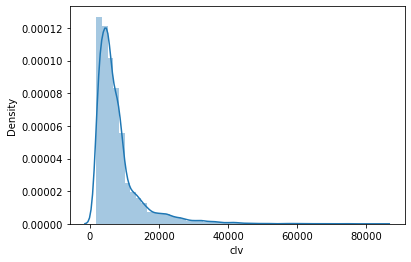

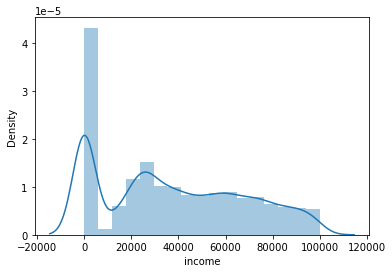

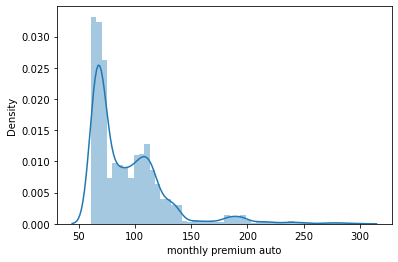

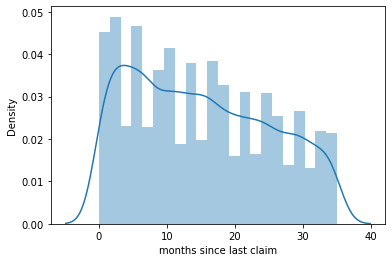

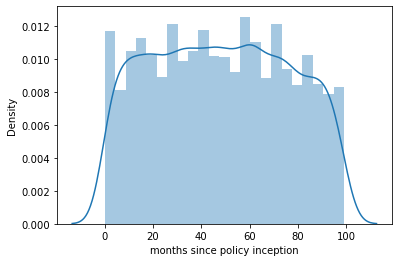

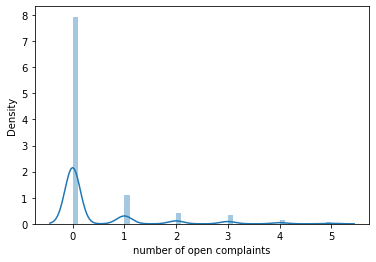

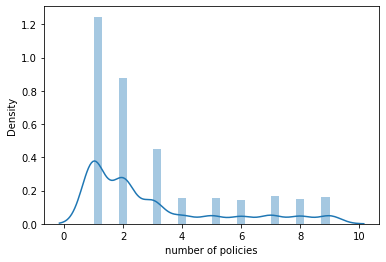

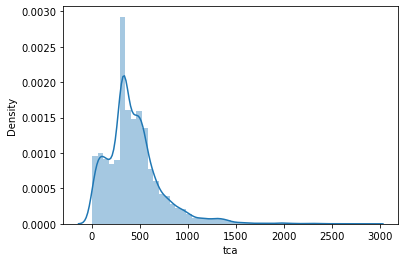

In [12]:
for col in dfnumerical.columns:
    sns.distplot(dfnumerical[col])
    plt.show()

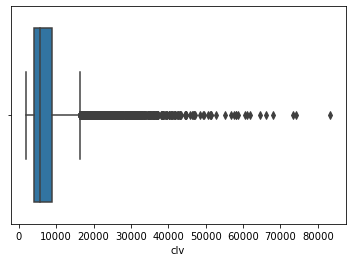

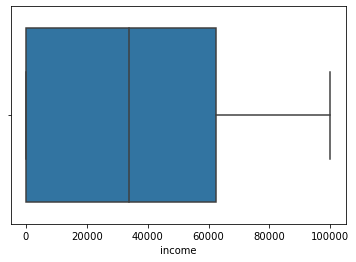

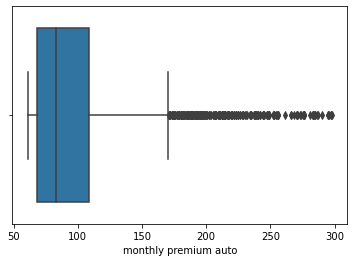

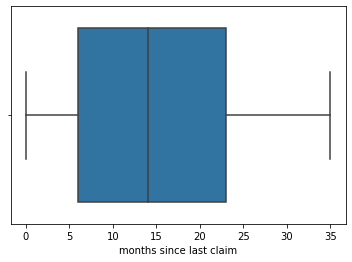

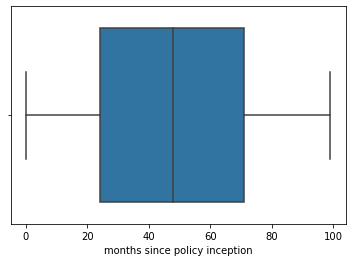

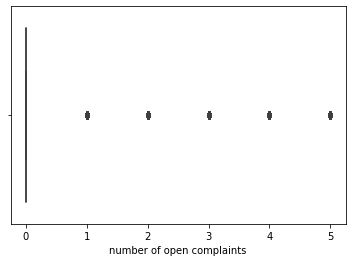

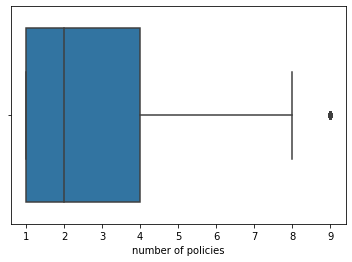

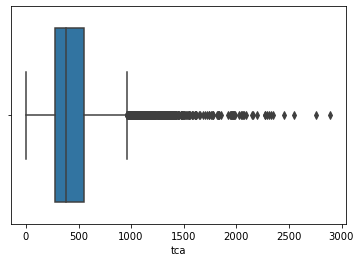

In [13]:
for col in dfnumerical.columns:
    sns.boxplot(dfnumerical[col])
    plt.show()

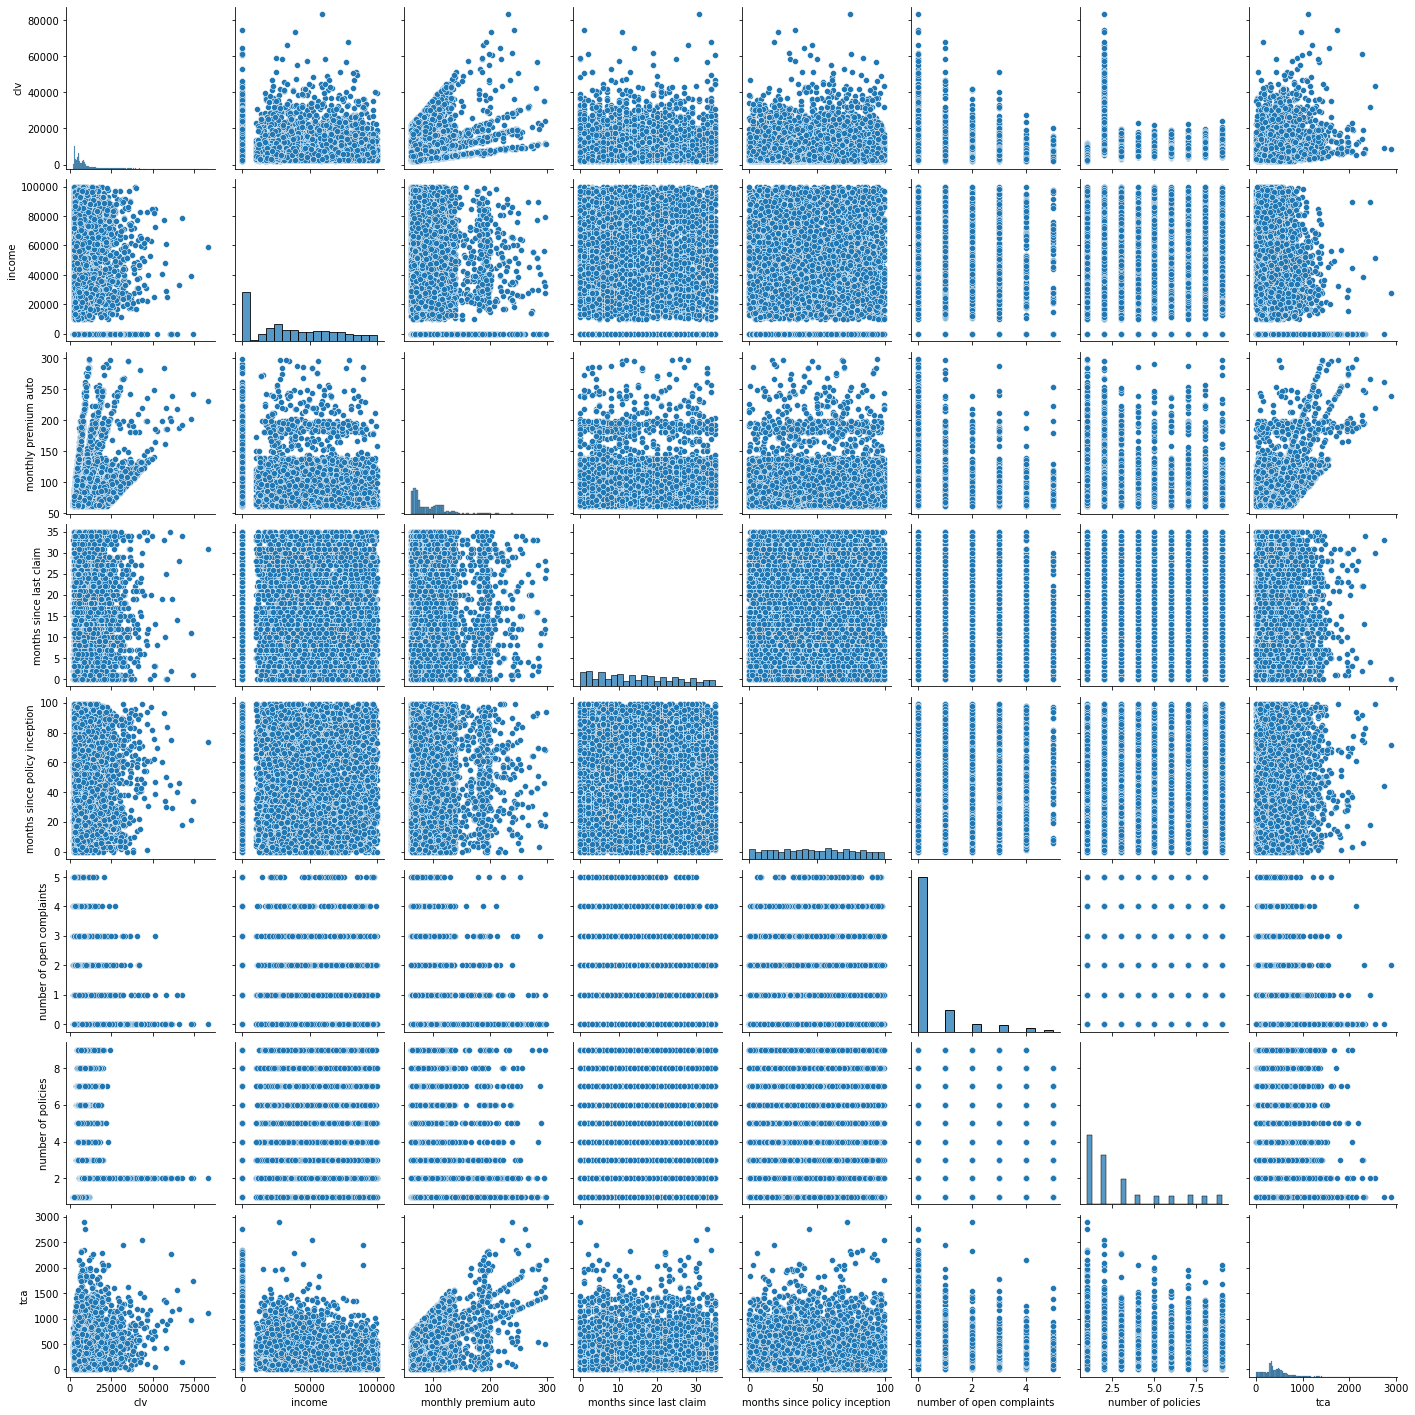

In [14]:
sns.pairplot(df)

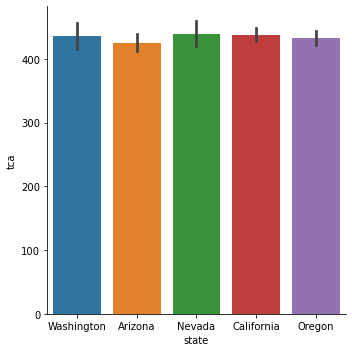

In [15]:
sns.catplot(x="state", y="tca", data = df, kind="bar")

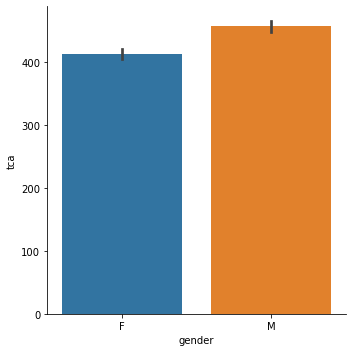

In [16]:
sns.catplot(x="gender", y="tca", data = df, kind="bar")

In [17]:
df.corr()

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,tca
clv,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
tca,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

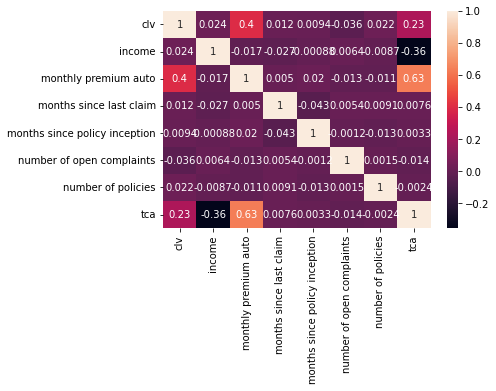

In [18]:
annot = True
sns.heatmap(df.corr(), annot=annot)

# Processing Data

## 1. Dealing with outliers

,effective to date,customer,state,clv,response,coverage,education,es,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,tca
0,2/24/11,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
2,2/19/11,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,1/20/11,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2/3/11,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
5,1/25/11,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2/10/11,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,198.234764
9130,2/12/11,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
9131,2/6/11,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
9132,2/3/11,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,691.200000


<AxesSubplot:xlabel='tca', ylabel='Density'>

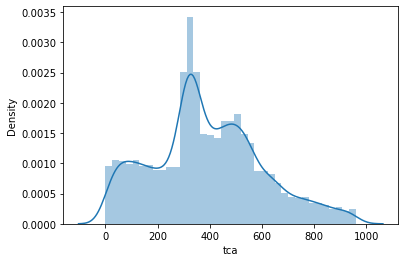

In [19]:
#eliminating outliars from tca

iqr = np.percentile(df["tca"], 75) - np.percentile(df["tca"], 25)
upper_limit = np.percentile(df["tca"], 75) + 1.5 * iqr
lower_limit = np.percentile(df["tca"], 25) - 1.5 * iqr

mask_not_outlier = (df.tca <= upper_limit) & (df.tca >= lower_limit)
df_cleaned_outliers = df[mask_not_outlier]
display(df_cleaned_outliers)
sns.distplot(df_cleaned_outliers['tca'])

In [20]:
df_cleaned_outliers

,effective to date,customer,state,clv,response,coverage,education,es,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,tca
0,2/24/11,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
2,2/19/11,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,1/20/11,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2/3/11,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
5,1/25/11,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2/10/11,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,198.234764
9130,2/12/11,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
9131,2/6/11,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
9132,2/3/11,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,691.200000


<AxesSubplot:xlabel='tca'>

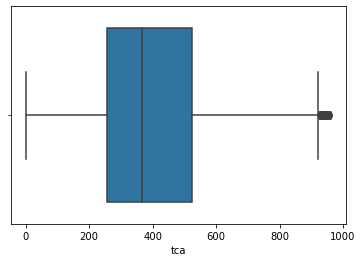

In [21]:
sns.boxplot(df_cleaned_outliers.tca)

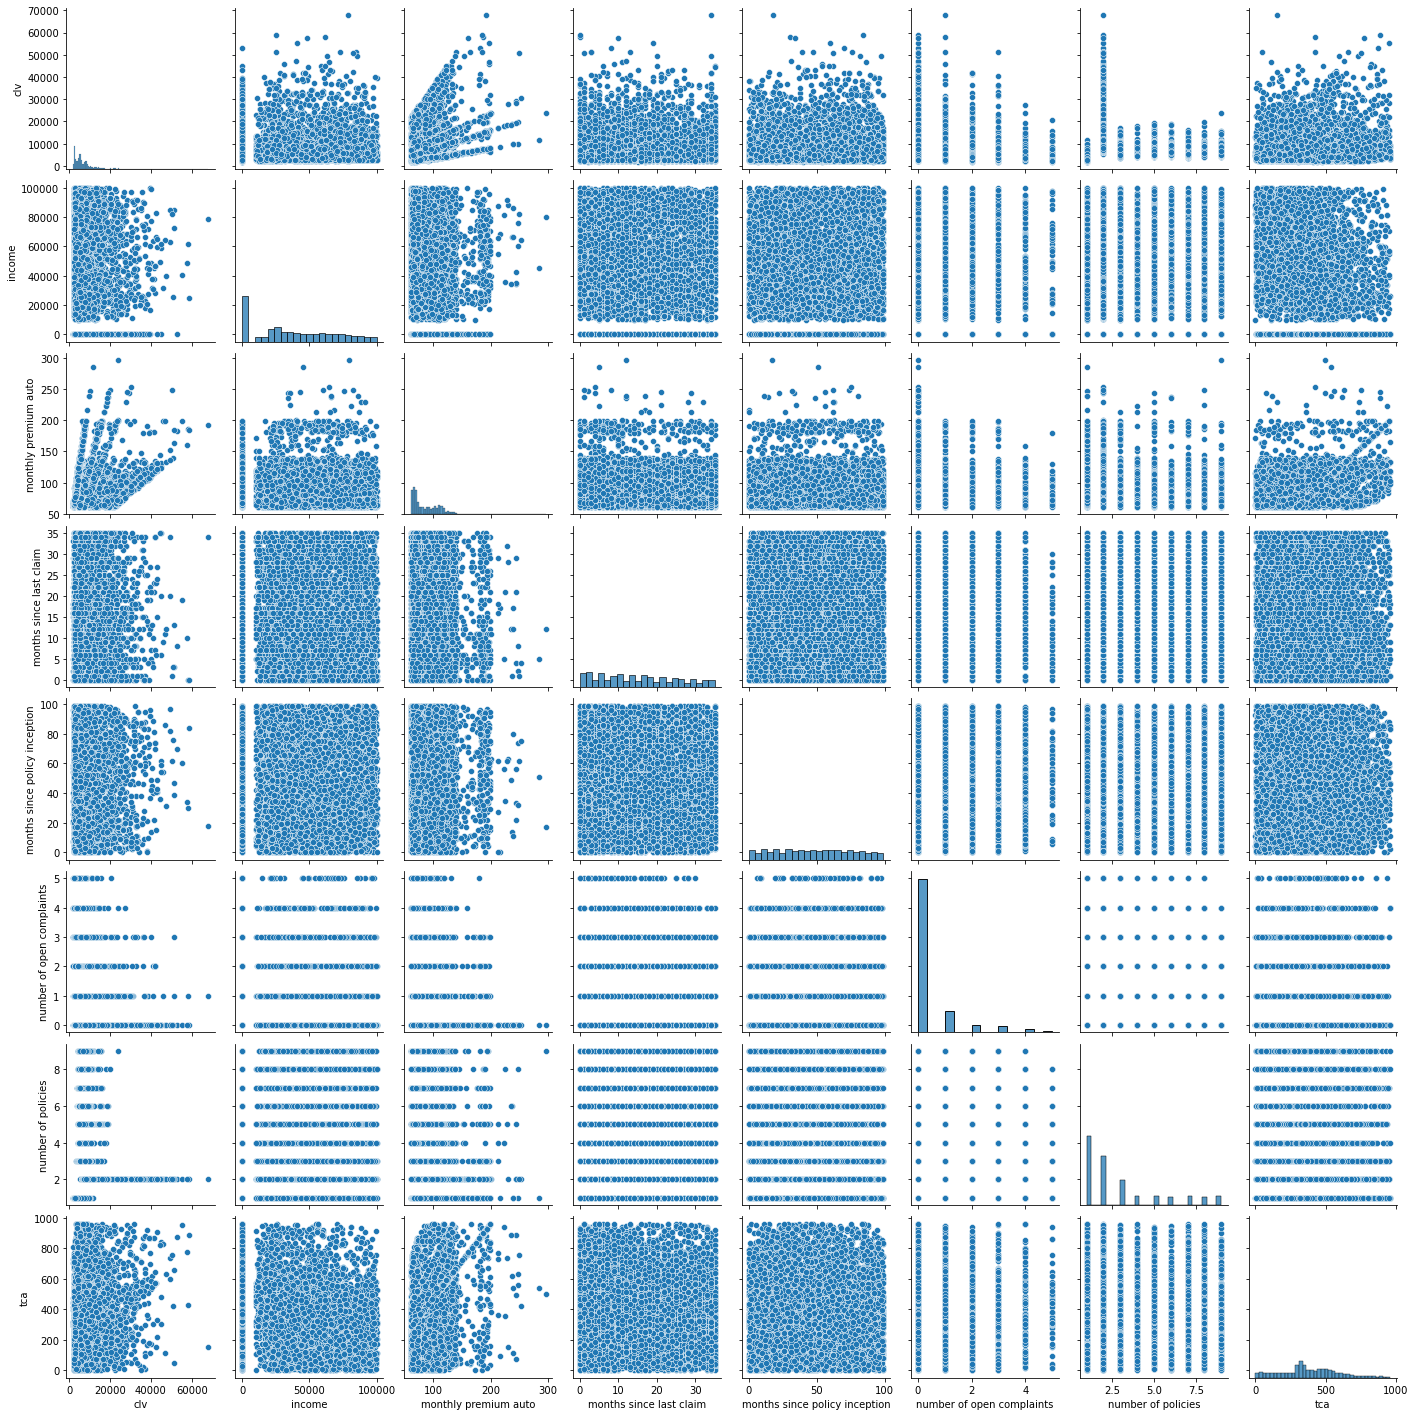

In [22]:
sns.pairplot(df_cleaned_outliers)

clv


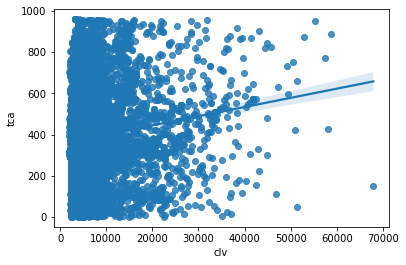

income


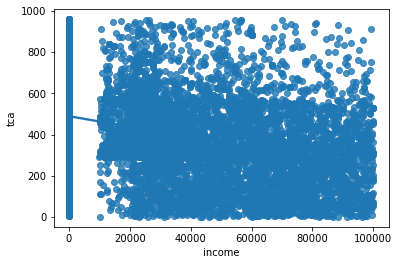

monthly premium auto


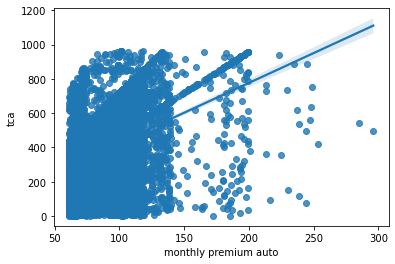

In [23]:
for i in ['clv', 'income', 'monthly premium auto']:
    print(i)
    sns.regplot(data=df_cleaned_outliers, x=i, y="tca")
    plt.show()

In [24]:
df_cleaned_outliers.corr()

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,tca
clv,1.000000,0.044729,0.355564,0.006475,-0.000172,-0.033197,0.018780,0.134456
income,0.044729,1.000000,0.045564,-0.023441,0.000063,0.002830,-0.005389,-0.368590
monthly premium auto,0.355564,0.045564,1.000000,-0.016350,0.011024,-0.017310,-0.022519,0.446886
months since last claim,0.006475,-0.023441,-0.016350,1.000000,-0.050453,0.007570,0.006775,-0.017016
months since policy inception,-0.000172,0.000063,0.011024,-0.050453,1.000000,-0.003625,-0.017349,-0.017188
number of open complaints,-0.033197,0.002830,-0.017310,0.007570,-0.003625,1.000000,0.003961,-0.015980
number of policies,0.018780,-0.005389,-0.022519,0.006775,-0.017349,0.003961,1.000000,-0.012835
tca,0.134456,-0.368590,0.446886,-0.017016,-0.017188,-0.015980,-0.012835,1.000000


<AxesSubplot:>

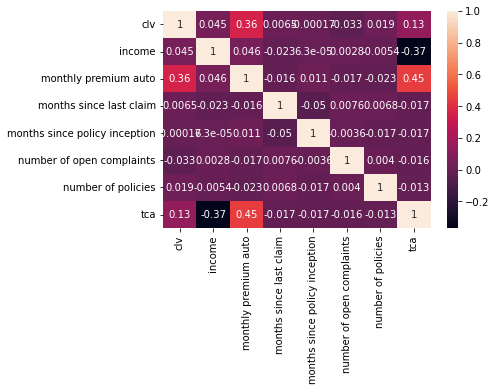

In [25]:
annot = True
sns.heatmap(df_cleaned_outliers.corr(), annot=annot)

## 2. Encoding Categorical Data

In [26]:
#X are the explanatory features: I am not considering the "Customer" and "Effective to Date" features as both don't appear to be relevant to calculate the linear regression and the goal established for this lab   
#y is the target vector -> "total claim anmount" (tca)
X = df_cleaned_outliers.iloc[:, 2:-1]
y = df_cleaned_outliers.iloc[:, -1]

In [27]:
X

,state,clv,response,coverage,education,es,gender,income,location code,marital status,...,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,...,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [28]:
y.head(10)

0     384.811147
2     566.472247
3     529.881344
4     138.130879
5     159.383042
6     321.600000
7     363.029680
8     511.200000
9     425.527834
10    482.400000
Name: tca, dtype: float64

In [29]:
#Normalize (numerical) of X
#One hot encoding using pd dummies
X = pd.get_dummies(X, drop_first=True)
display(X)
print("Original df cleaned outliers shape:",df_cleaned_outliers.shape)
print("X Shape:",X.shape)

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,2763.519279,56274,69,32,5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,12887.431650,48767,108,18,38,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,8256.297800,62902,69,14,94,0,2,0,0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,37,3,2,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Original df cleaned outliers shape: (8681, 24)
X Shape: (8681, 50)


## 3. Train-test split and Normalization

In [30]:
# division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
X_train

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
1930,19357.372010,0,68,20,66,1,2,0,0,1,...,1,0,0,0,0,0,0,0,1,0
747,5435.767832,0,73,12,71,0,4,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3841,8417.102804,31756,107,1,97,0,3,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3020,2414.072446,0,71,25,30,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4067,5350.214918,41336,68,33,25,0,5,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,7431.664369,27688,92,8,86,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8299,7756.174223,21326,99,22,9,0,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5111,5862.803295,75121,73,12,22,0,6,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3418,10484.915350,61108,89,22,93,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

In [33]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Modeling

## 1. Apply model

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() 

In [35]:
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
#coeficients of the regressor
reg.coef_

array([-4.44194328e-01, -5.20960756e+00,  9.25082795e+01,  1.08056206e+00,
       -1.07354217e+00, -2.87600495e-01,  2.86935909e-01,  4.39285289e-01,
       -8.72371239e-03,  3.00050358e-01,  2.59064303e+00, -4.93304101e+00,
        3.91043421e+00,  4.38978294e+00, -2.99904958e+00, -1.71019792e+00,
        3.02670288e+00, -1.29458367e+00,  9.27726694e-01,  2.47902290e+00,
        2.11778788e+00,  2.13593576e+01,  3.64941328e+00,  1.78454851e+02,
        8.52000817e+01, -3.74071300e-01,  2.02200161e+01,  1.75288050e+14,
        1.11999827e+14,  5.93321984e-01,  1.71386458e-01, -1.37160844e+14,
       -1.69606590e+14, -1.94909923e+14, -4.55826719e+13, -7.38109463e+13,
       -7.31720546e+13,  4.65243089e+00,  3.23065980e+00,  2.71435648e+00,
        1.59909704e+00,  3.67211224e-01,  5.11196696e-01,  8.32427593e-01,
       -3.03606510e+00,  1.17356133e+01,  4.56254203e+00,  1.48380626e+00,
        1.50419577e+00,  5.42699069e+00])

In [37]:
predictions_train = reg.predict(X_train)

In [38]:
predictions_train.size

6510

In [39]:
X_train.shape

(6510, 50)

# Model Validation

## 1. R2 (r squared)

In [40]:
from sklearn.metrics import r2_score

predictions_test = reg.predict(X_test)

display(r2_score(y_train, predictions_train))
r2_score(y_test, predictions_test)

0.7903291101214716

0.77686929019532

# Reporting

## 1. Present Results

In [51]:
# Cleaned dataset
    #The cleaned dataset to explain the variations in "Total Claim Amount" had the following main characteristics:
        # - no features were drop other than Customer ID and Effective to Date, as there were no high correlations between the explanatory features
        # - only the outliers from Total Claim Amount (target feature) were removed, as removing all of them was affecting the performance of the model


# Model results
    # The performance of the model, according to R2 score, shows that 78% of the variation in the output variable (Total Claim Amount) is explained by the input variables.
    # The train set performed slightly better than the test set (0.79 and 0.78 respectively). 
    # The model overfits but not significantly, due to the small the difference between train and test sets scores.
    # As the R2 score is close to 0.8 and the performance between both train and test sets are similar, I would consider to apply the model with new data to try to predict the Total Claim Amount.

## Extra: Predict set vs Test set

In [41]:
#Couldn't elaborate well the plot to interpret the results visually, but decided to keep it to try to improve the model later on the bootcamp

In [42]:
y_test

2526    352.060768
8894    106.528651
7009    501.265130
8932    289.772690
8034    513.511091
           ...    
5075    297.600000
8595    714.494746
938     307.200000
7281    302.400000
261     140.165035
Name: tca, Length: 2171, dtype: float64

In [43]:
predictions_test

array([330.84250144, 114.83008928, 445.79304207, ..., 444.12641751,
       368.6739813 ,  -4.88273918])

In [44]:
x = predictions_test
y = y_test 

In [45]:
x.size

2171

In [46]:
t = np.arange(0,2171)

In [47]:
t

array([   0,    1,    2, ..., 2168, 2169, 2170])

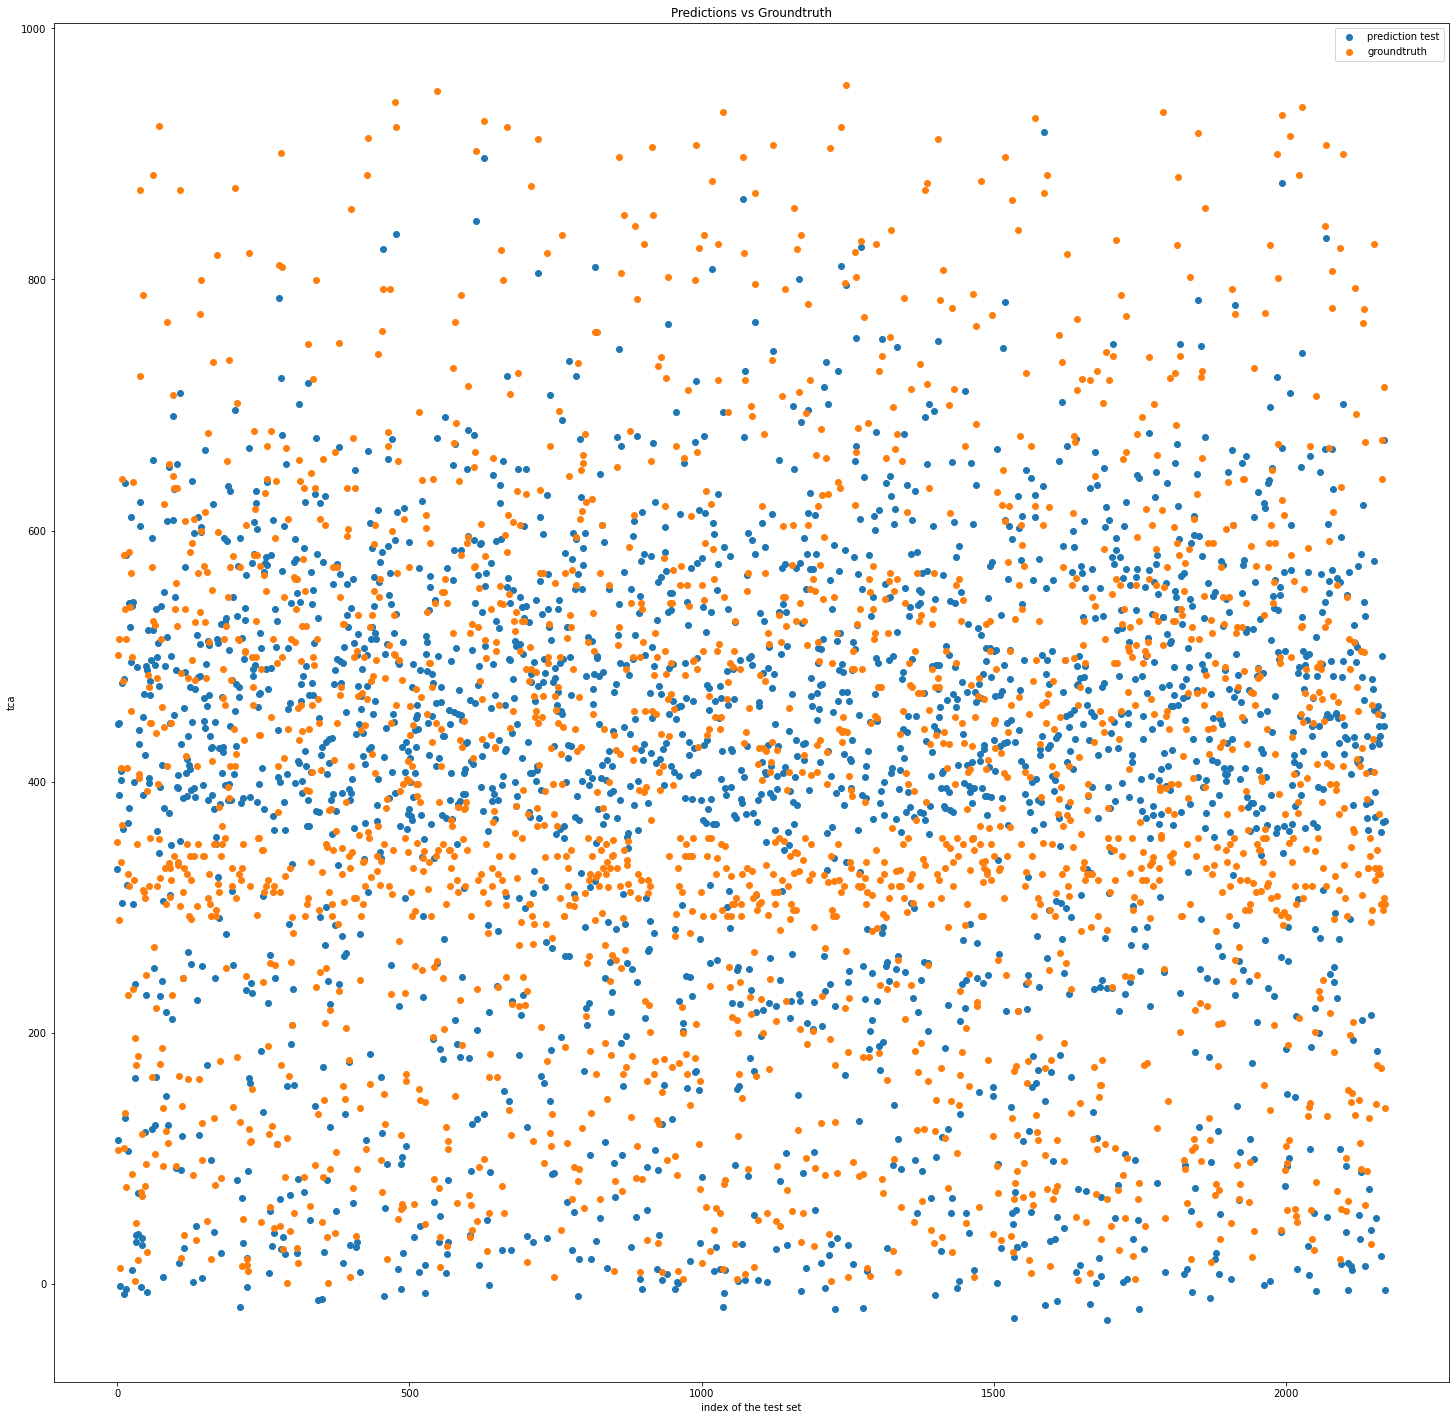

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))

plt.scatter(t, x)
plt.scatter(t, y)

plt.title("Predictions vs Groundtruth")

plt.xlabel("index of the test set")
plt.ylabel("tca")

plt.legend(["prediction test", "groundtruth"], loc="upper right")

plt.show()

